In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
folder_labels = '../data/labels/'
df_pre = pd.read_csv(folder_labels + 'presorted/labels.csv')
df_clu = pd.read_csv(folder_labels + 'cluttered/labels.csv')
df_hard = pd.read_csv(folder_labels + 'harder_samples/labels.csv')

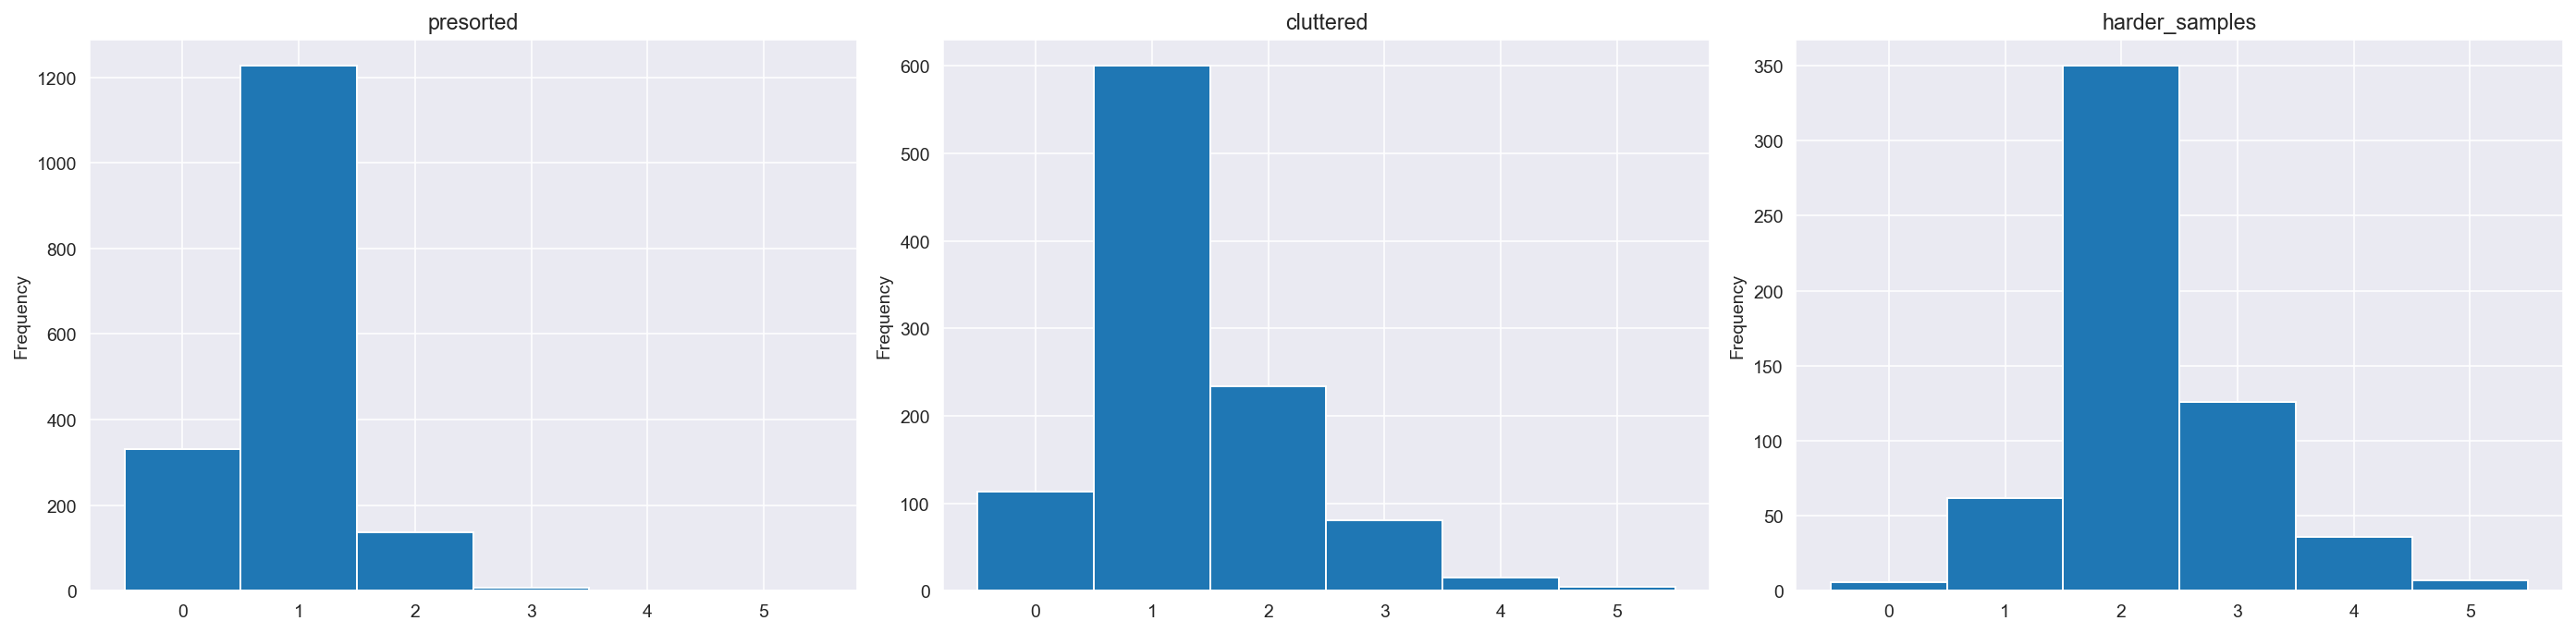

In [3]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5), dpi=140)
for i, df in enumerate([df_pre, df_clu, df_hard]):
    df.plot(
        ax=axes[i],
        kind="hist",
        y='count',
        legend=False,
        title=df['folder'][0],
        bins=range(7),
        align='left'
    )
fig.tight_layout()
plt.show()

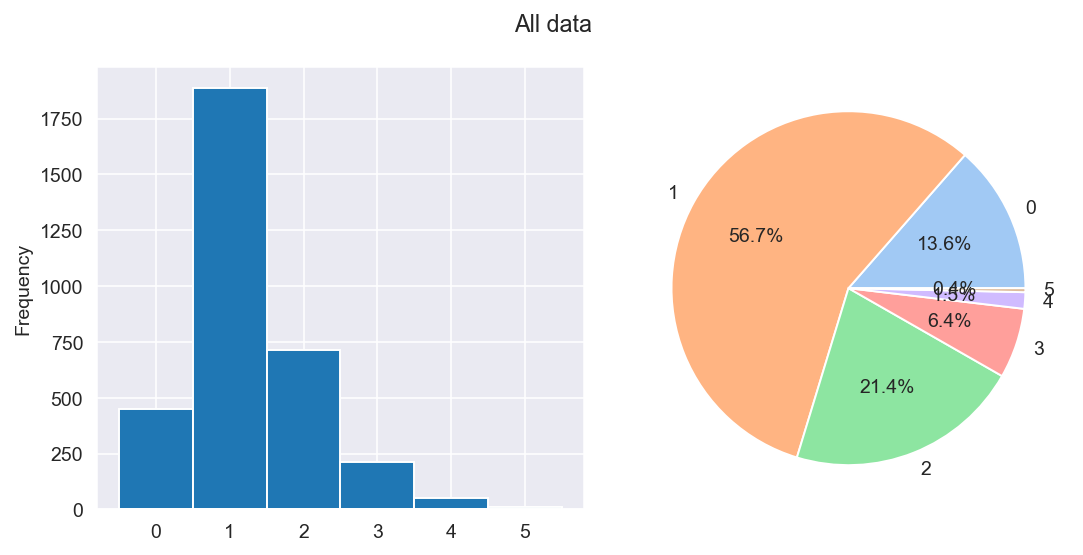

In [4]:
df = pd.concat([df_clu, df_pre, df_hard], axis=0)
df = df[~df['issue']].drop('issue', axis=1)
df['name'] = df.apply(lambda row: row['folder'] + '/' + row['name'], axis=1)

fig, axes = plt.subplots(ncols=2, figsize=(8, 4), dpi=140)
fig.suptitle('All data')
df.plot(
    ax=axes[0],
    kind="hist",
    y='count',
    legend=False,
    bins=range(7),
    align='left'
)

df['count'].value_counts().sort_index().plot(
    kind="pie",
    ax=axes[1],
    y='count',
    autopct="%.1f%%",
    ylabel='',
    legend=False,
    colors=sns.color_palette("pastel")
)
fig.tight_layout()
plt.show()

In [5]:
X = df['name'].copy()
y = df.drop(['folder', 'name'], axis=1).astype('int').copy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y[['count', 'inside', 'transparent']])

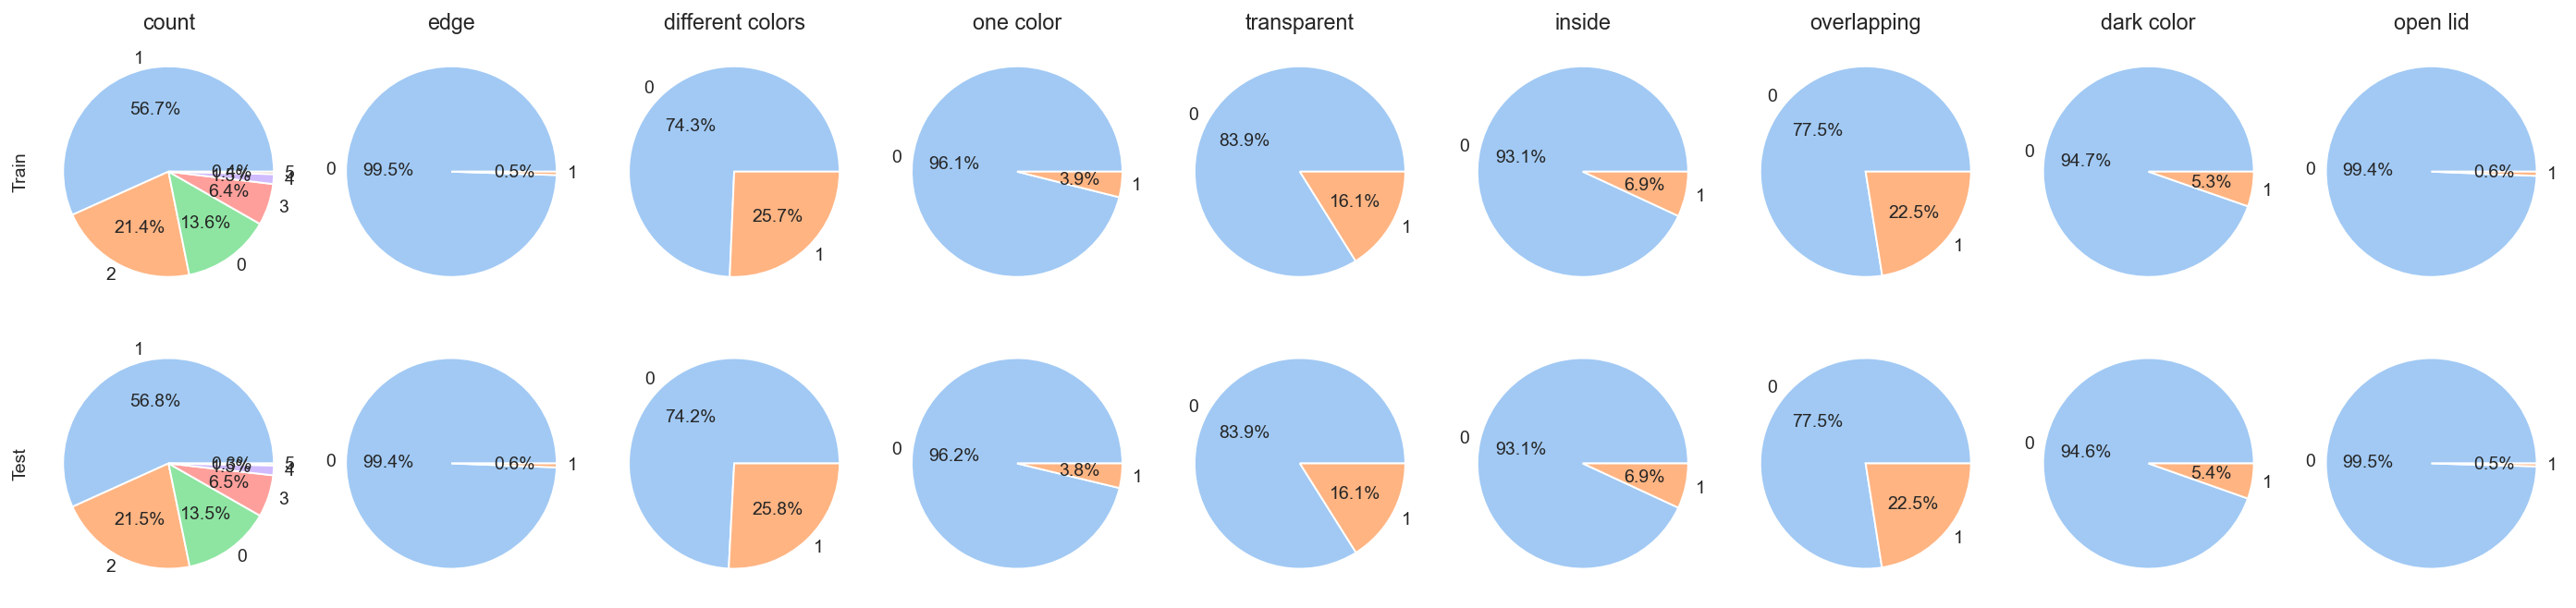

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=len(y.columns), figsize=(20, 5), dpi=140)
for i, column in enumerate(y.columns):
    for j, df_y in enumerate([y_train, y_test]):
        d_top = df_y[column].value_counts().copy()
        d_top = d_top.to_frame().reset_index(level=0)

        title = ''
        if j == 0:
            title = column

        ylabel = ''
        if i == 0 and j == 0:
            ylabel = 'Train'
        elif i == 0 and j == 1:
            ylabel = 'Test'

        d_top.sort_index().plot(
            kind="pie",
            ax=axes[j, i],
            y=column,
            labels=d_top.sort_index()['index'],
            autopct="%.1f%%",
            ylabel=ylabel,
            legend=False,
            colors=sns.color_palette("pastel"),
            title=title,
        )
fig.tight_layout()
plt.show()

In [8]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [9]:
df_train.to_csv('../data/train.csv', index=False)
df_test.to_csv('../data/test.csv', index=False)